# CS M148 Project 2 - Binary Classification Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a **patient is suffering from heart disease** based on a host of potential medical factors.

**DEFINITIONS**

**Binary Classification:** In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

**Supervised Learning:** This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

`sick` is the label that you will be predicting.

## Loading Essentials and Helper Functions 

In [1]:
# Here are a set of libraries we imported to complete this assignment. 
# Feel free to use these or equivalent libraries for your implementation
# and also add more import statements if any are missing.
# If you can run this cell without any errors, you're ready to go.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import os
import random

%matplotlib inline

random.seed(148) 

In [2]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, y_hat, title_name="Confusion Matrix"):
    '''Draws a confusion matrix for the given target and predictions'''
    cm = metrics.confusion_matrix(y, y_hat)
    metrics.ConfusionMatrixDisplay(cm).plot()
    plt.title(title_name)

## Part 1. Load the Data and Analyze

Let's load our dataset so we can work with it (correct the path if your notebook is in a different directory than the .csv file).

In [3]:
df = pd.read_csv('heartdisease.csv')

### Question 1.1 (DONE)

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the `head()`, `describe()`, and `info()` methods to display some of the rows so we can get a sense of the data.

In [4]:
# Your code here
# You may use separate cells if you'd like (one for `head`, one for `describe`, etc.)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Question 1.2 (DONE)
If you looked carefully, you might have noticed that in the data, all the `sick=False` values come before the `sick=True` values in the dataset. Why might this be problematic?

This is because when we perform the train-test split, we might approach it by taking the first N rows for train data, and the rest for test data. This will cause us to predominantly train on the data that has sick=False, restricting from our model to learn for data points that have sick=True, thus, wont perform well when trying to predict on our test portion

### Question 1.3 (DONE)
Shuffle the rows in the dataframe so that the `sick=False` and `sick=True` values are randomly distributed in the dataframe.

In [7]:
df = df.sample(frac = 1)

### Question 1.4 (DONE)
Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problematic and why?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 246 to 26
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 33.4 KB


From the info() call, we see that all of our columns that is not sick are of numeric type (either int64 or float64). Thus, the only problematic one that could possibly cause problems is sick which is of type bool which is non numeric

### Question 1.5 (DONE)
Determine if we're dealing with any null values. If so, report which columns.

We are not dealing with any null values - we have 303 rows, and for each column, we have 303 non-null values (seen from the info() call on df)

### Question 1.6 (DONE)
Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean `sick` variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original `sick` datafield from the dataframe.

In [9]:
df["sick"] = df.apply(lambda row: 1 if (row["sick"]) else 0, axis=1)

### Question 1.7 (DONE)
Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to get a feel of how each variable performs (for example, is it a binary, or limited selection, or does it follow a gradient)? 

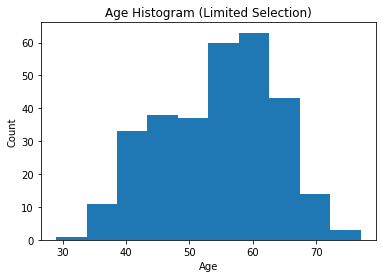

In [10]:
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Histogram (Limited Selection)")
plt.show()

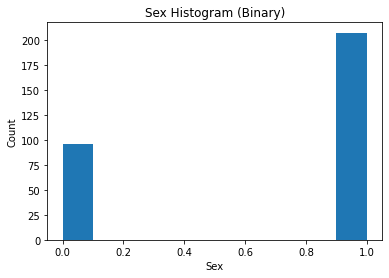

In [11]:
plt.hist(df["sex"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Histogram (Binary)")
plt.show()

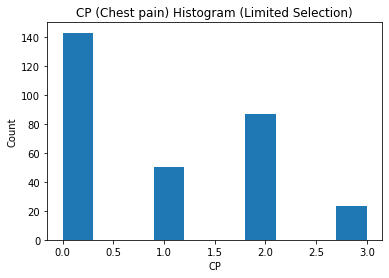

In [12]:
plt.hist(df["cp"])
plt.xlabel("CP")
plt.ylabel("Count")
plt.title("CP (Chest pain) Histogram (Limited Selection)")
plt.show()

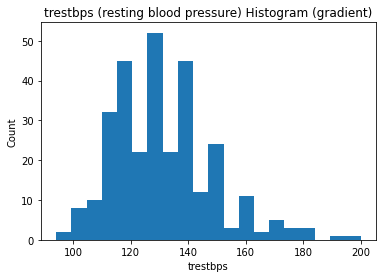

In [13]:
plt.hist(df["trestbps"],bins=20)
plt.xlabel("trestbps")
plt.ylabel("Count")
plt.title("trestbps (resting blood pressure) Histogram (gradient)")
plt.show()

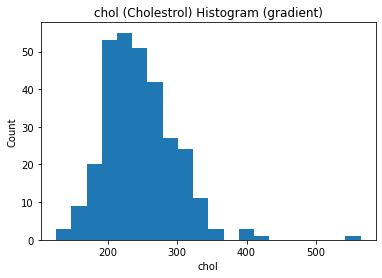

In [14]:
plt.hist(df["chol"],bins=20)
plt.xlabel("chol")
plt.ylabel("Count")
plt.title("chol (Cholestrol) Histogram (gradient)")
plt.show()

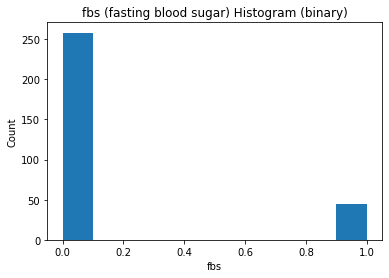

In [15]:
plt.hist(df["fbs"])
plt.xlabel("fbs")
plt.ylabel("Count")
plt.title("fbs (fasting blood sugar) Histogram (binary)")
plt.show()

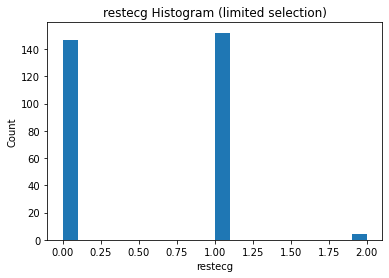

In [16]:
plt.hist(df["restecg"],bins=20)
plt.xlabel("restecg")
plt.ylabel("Count")
plt.title("restecg Histogram (limited selection)")
plt.show()

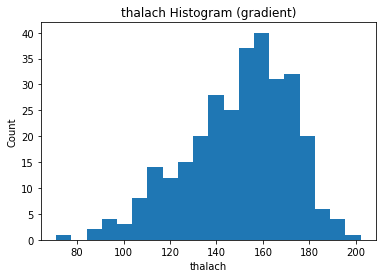

In [17]:
plt.hist(df["thalach"],bins=20)
plt.xlabel("thalach")
plt.ylabel("Count")
plt.title("thalach Histogram (gradient)")
plt.show()

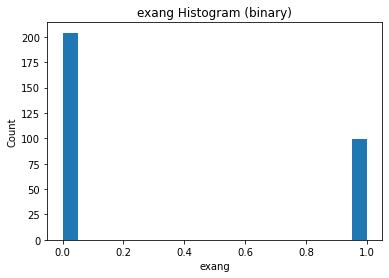

In [18]:
plt.hist(df["exang"],bins=20)
plt.xlabel("exang")
plt.ylabel("Count")
plt.title("exang Histogram (binary)")
plt.show()

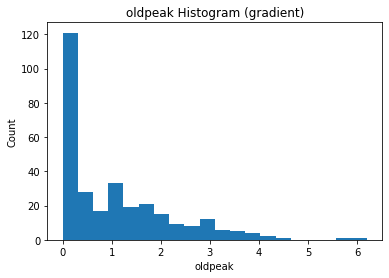

In [19]:
plt.hist(df["oldpeak"],bins=20)
plt.xlabel("oldpeak")
plt.ylabel("Count")
plt.title("oldpeak Histogram (gradient)")
plt.show()

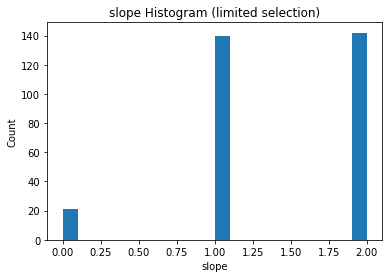

In [20]:
plt.hist(df["slope"],bins=20)
plt.xlabel("slope")
plt.ylabel("Count")
plt.title("slope Histogram (limited selection)")
plt.show()

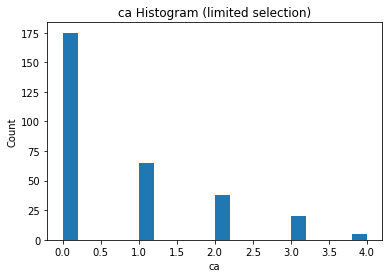

In [21]:
plt.hist(df["ca"],bins=20)
plt.xlabel("ca")
plt.ylabel("Count")
plt.title("ca Histogram (limited selection)")
plt.show()

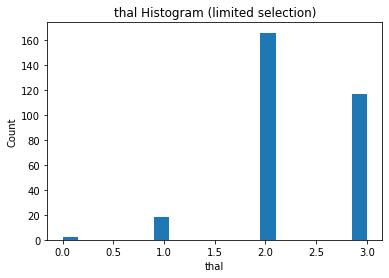

In [22]:
plt.hist(df["thal"],bins=20)
plt.xlabel("thal")
plt.ylabel("Count")
plt.title("thal Histogram (limited selection)")
plt.show()

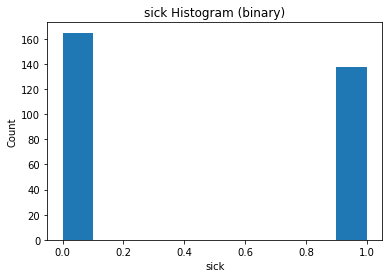

In [23]:
plt.hist(df["sick"])
plt.xlabel("sick")
plt.ylabel("Count")
plt.title("sick Histogram (binary)")
plt.show()

### Question 1.8 (DONE)
We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results.

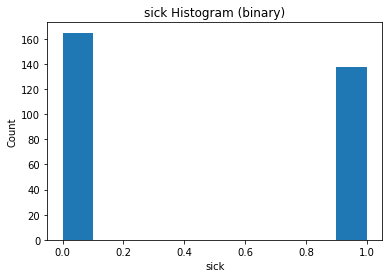

# of 0s: (false == no disease) 165
# of 1s: (true == disease)139


In [24]:
plt.hist(df["sick"])
plt.xlabel("sick")
plt.ylabel("Count")
plt.title("sick Histogram (binary)")
plt.show()

temp_sick = df["sick"]
zero_count = 0
one_count = 1
for x in temp_sick:
    if x == 0:
        zero_count += 1
    else:
        one_count += 1
print("# of 0s: (false == no disease) " + str(zero_count))
print("# of 1s: (true == disease)" + str(one_count))

As we can see, our sample contains 165 healthy individuals and 139 sick individuals, which reflects a roughly balanced dataset since we have only a difference of 25 between the two - making it an equitable balance

### Question 1.9 (DONE)
Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially inflating numbers to balance a dataset may result in disproportionally representing the actual truth - in this case, there might just be more healthy people than sick people in the world, and by trying to balance these two, we are not representing the real population accurately. Concurrently showing statistically uncommon events as likely may result in overfitting to the data that corresponds to statistically uncommon event, and also predicting more of those uncommon events than needed.

### Question 1.10 (DONE)
Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations (get some domain knowledge). Intuitively, why do you think some variables correlate more highly than others? Also discuss some pairs of variables that have very little correlation and why this might be the case for them.

Hint: one possible approach you can use the `sns.heatmap()` function to map the corr() method. Note: if your heatmap is not entirely visible, [this link](https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986) may be helpful in solving the issue.

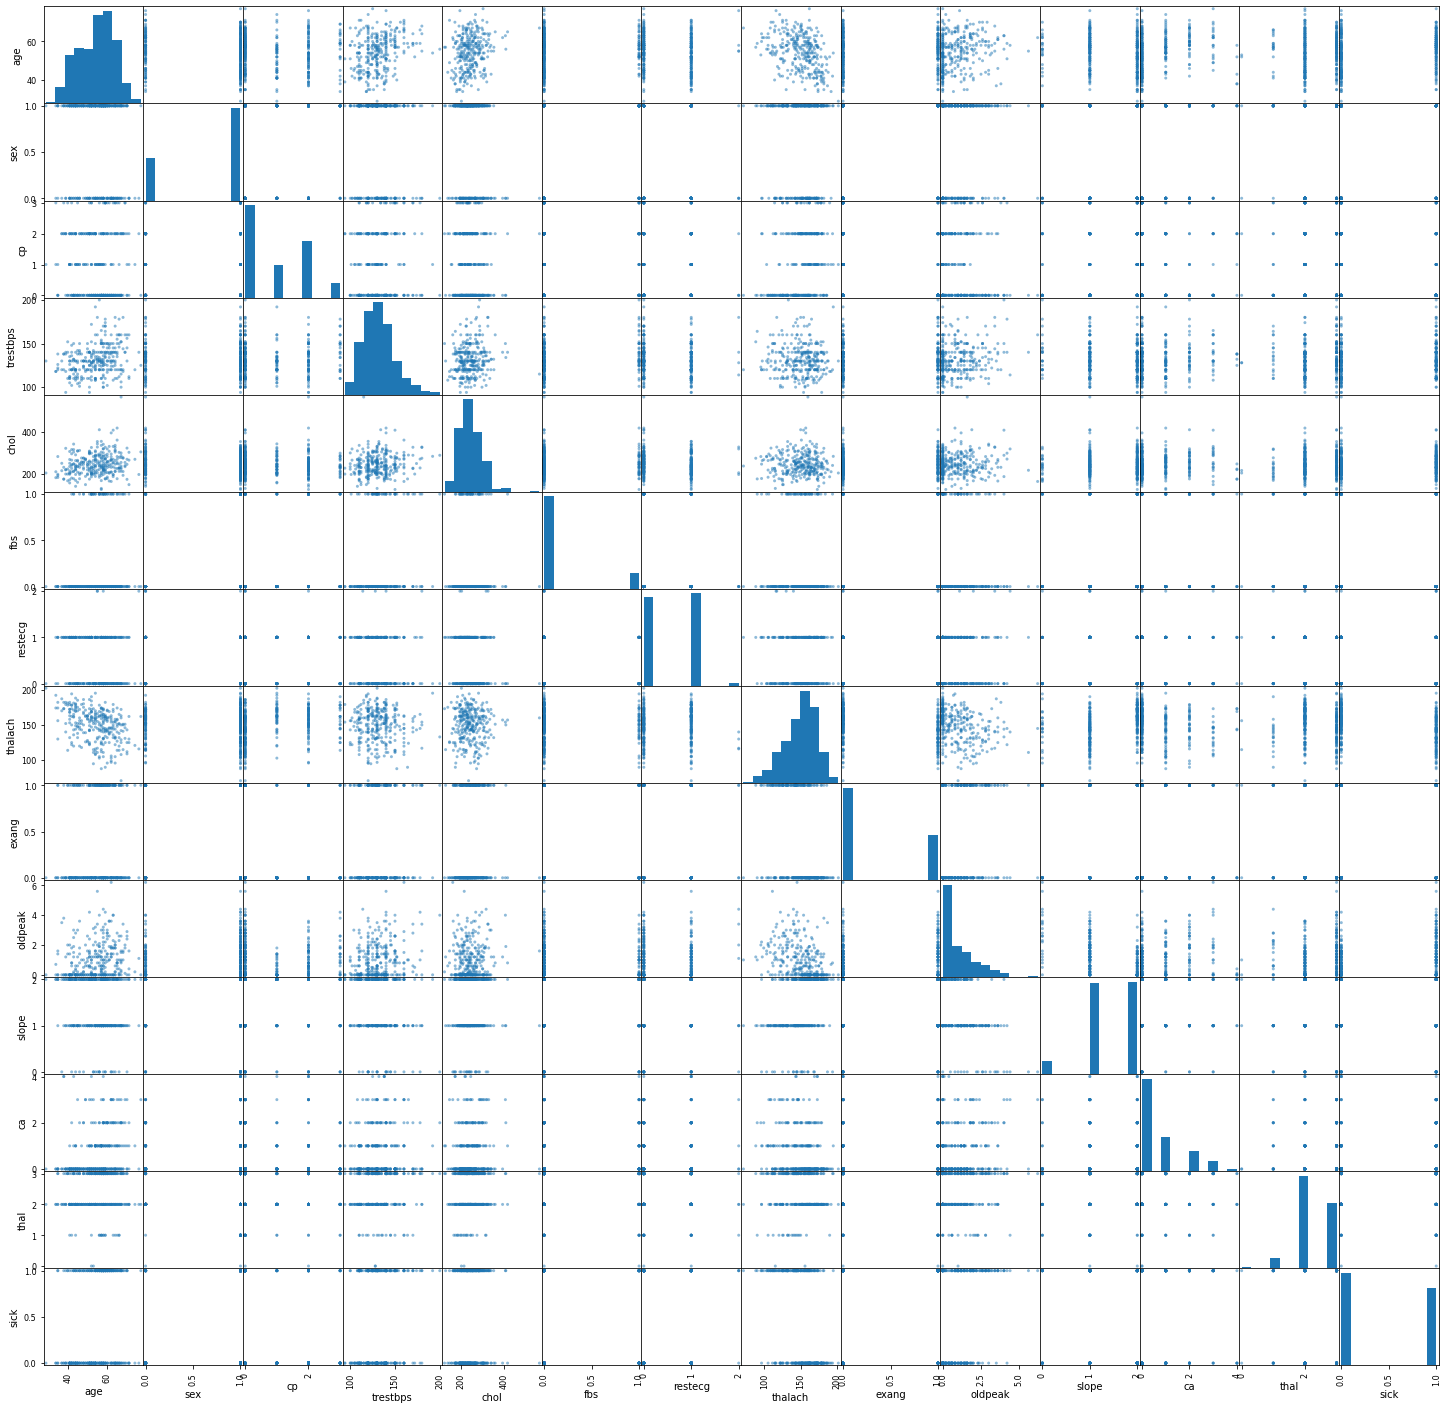

In [25]:
from pandas.plotting import scatter_matrix
corr_matrix = df.corr()
attributes = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","sick"]
scatter_matrix(df[attributes], figsize=(25,25))
plt.show()

We see that there is negative correlation between age and thalach, and this can be supported with the fact that we often estimate our maximum heart rate by calculating 220 - age. Thus, as we grow older, we expect that the maximum heart rate will decrese, which this plot shows. We also see that age has somewhat a positive correlation with cholestrol, and this is because as we grow old, our body decays and our ability to maintain blood sugar levels deterioriate - increasing the chance of high cholestrol. Some variables are highly correlated than others due to their nature and how similar the underlying causes of each variable is. Variables that uare not correlated is thalach and cholestrol, since the rate that our heart pumpls blood is independent to how much sugar is in our blood.

## Part 2. Prepare the Data

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

We're going to ask you to prepare 2 batches of data:
1. Raw numeric data that hasn't gone through any additional pre-processing.
2. Data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 (DONE)
Save the target column as a separate array and then drop it from the dataframe. 

In [26]:
target = df["sick"]
df = df.drop(["sick"],axis=1)

### Question 2.2 (DONE)
Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the `train_test_split` method). Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [27]:
train_x, test_x, train_y, test_y = train_test_split(df, target, test_size = 0.2, random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(242, 13)
(242,)
(61, 13)
(61,)


### Question 2.3 (DONE)
In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN relies on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a KNN algorithm on our data (use `scikit-learn`) and report the results. For this initial implementation simply use the default KNN model settings. Report on the accuracy of the resulting model.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(train_x, train_y)

predictions_on_train = neigh.predict(train_x)
train_acc = metrics.accuracy_score(train_y, predictions_on_train)
print("Accuracy on training data: " + str(train_acc))

predictions_on_test = neigh.predict(test_x)
test_acc = metrics.accuracy_score(test_y, predictions_on_test)
print("Accuracy on test data: " + str(test_acc))

Accuracy on training data: 0.7603305785123967
Accuracy on test data: 0.7049180327868853


### Question 2.4 (DONE)
Now implement a pipeline of your choice to transform the data. You can opt to handle null values and categoricals however you wish, however please scale your numeric features using standard scaler. Refer to Project 1 for a example pipeline that you can mimic.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = list(set(df.columns)-set(numerical_features))

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),    
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

df_transformed = pd.DataFrame(full_pipeline.fit_transform(df))

### Question 2.5 (DONE)
Now split your pipelined data into an 80/20 split and run the same KNN as you did previously. Report its accuracy, and discuss the implications of the different results you are obtaining.

In [42]:
train_x_transformed, test_x_transformed = train_test_split(df_transformed, test_size = 0.2, random_state=42)

neigh_trans = KNeighborsClassifier()
neigh_trans.fit(train_x_transformed, train_y)

predictions_on_train = neigh_trans.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_y, predictions_on_train)
print("Accuracy on training data: " + str(train_acc))

predictions_on_test = neigh_trans.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_y, predictions_on_test)
print("Accuracy on test data: " + str(test_acc))

Accuracy on training data: 0.9132231404958677
Accuracy on test data: 0.7540983606557377


We see that when we run the kNN on our transformed data compared to our original pre-processesd data, we get a much higher accuracy for the training data (~ +15%) and a higher accuracy for the test data (~ +5%). This might imply that our fitting method, which is kNN in this case, works better when our data is standardized by subtracting the mean and scaling to unit variance (which is what StandardScaler does).

### Question 2.6 Hyperparameter Optimization (DONE)
As we saw in lecture, the KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Let's now let `n` take on the values 1, 2, 3, 5, 7, 9, 10, 20, 50, 75, and 100. Run your model for each value and report the accuracy for each. Then, create a plot of accuracy versus `n_neighbors` and discuss how and why the accuracy changes as `n_neighbors` changes.

HINT: leverage Python's ability to loop to run through the array and generate results so that you don't need to manually code each iteration.

Accuracies for test data: [0.7704918032786885, 0.7377049180327869, 0.7540983606557377, 0.7540983606557377, 0.7868852459016393, 0.7868852459016393, 0.7540983606557377, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902]
-----------------------------------------------------
Accuracies for train data: [1.0, 0.871900826446281, 0.9173553719008265, 0.9132231404958677, 0.8966942148760331, 0.871900826446281, 0.871900826446281, 0.859504132231405, 0.8305785123966942, 0.8140495867768595, 0.8057851239669421]


[]

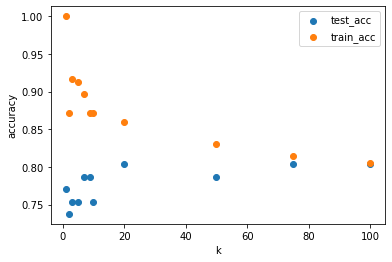

In [63]:
k_values = [1, 2, 3, 5, 7, 9, 10, 20, 50, 75, 100]
train_acc_array = []
test_acc_array = []

for k in k_values:
    knn_fit = KNeighborsClassifier(n_neighbors = k)
    knn_fit.fit(train_x_transformed, train_y)
    
    train_predictions = knn_fit.predict(train_x_transformed)
    test_predictions = knn_fit.predict(test_x_transformed)
    
    # Accuracy for train
    train_acc = metrics.accuracy_score(train_y, train_predictions)
    train_acc_array.append(train_acc)
    
    # Accuracy for test
    test_acc = metrics.accuracy_score(test_y, test_predictions)
    test_acc_array.append(test_acc)

print("Accuracies for test data: " + str(test_acc_array))
print("-----------------------------------------------------")
print("Accuracies for train data: " + str(train_acc_array))

plt.scatter(k_values, test_acc_array, label="test_acc")
plt.scatter(k_values, train_acc_array, label="train_acc")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.plot()  

As we see, at lower K values, the model works really well with the training data, and this is because we are overfitting to the extreme, so this is expected. This can also be seen how poorly lower k values work on test data since we have overfitted our model too much on the train data. As k increases, the accuracies seem to converge, and this is because when k gets really big, we are simply predicting with the mean of the data set (uniform value for any x input). The fact that accuracy increases as k increases for test data, this might indicate that kNN might not be the best for this model since the model that uses the "average" is acting as an upperbound to the accuracy for test data. Although this model works, we might need to explore other models for this data if we want a better accuracy on test data.

## Part 3. Additional Learning Methods
So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare results. Throughout this part, use the data that was produced by your pipeline earlier.

### Linear Decision Boundary Methods
We'll spend some time exploring logistic regression and SVM methods.

### Question 3.1 Logistic Regression (DONE)
Let's now try a classifier, we introduced in lecture, one that's well known for handling linear models: logistic regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.  Implement a logistic regression classifier from `scikit-learn` on your data with the default settings. For both training and test data, report accuracy, precision, recall, and F1 score and plot a confusion matrix.

----------- FOR TEST DATA -----------
accuracy: 0.8925619834710744
precision: 0.875
recall: 0.8909090909090909
f1: 0.8828828828828829
----------- FOR TEST DATA -----------
accuracy: 0.7704918032786885
precision: 0.7307692307692307
recall: 0.7307692307692307
f1: 0.7307692307692306


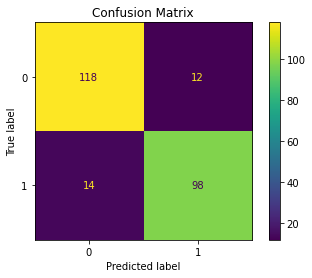

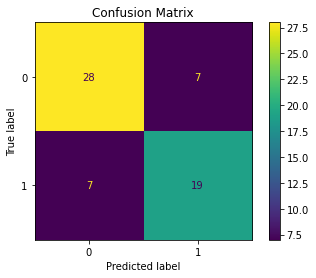

In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_transformed, train_y)

# For train data
train_predictions = log_reg.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = log_reg.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)


### Question 3.2 (DONE)
Discuss what each measure (accuracy, precision, recall, and F1 score) is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.


Accuracy is the ratio between the number of labels correctly predicted over the number of labels predicted. Precision is the ratio between true positives over the sum of true positive and false positive (tp / (tp+fp)). Recall is the ratio between true positive over the the sum of true positives and false negative (tp / (tp+fn)). Finally, f1 score combines presicion and recall into a single metric through their harmonic mean i.e. 2 * (precision * recall) / (precision + recall). Accuracy is significant as it is the basic measure that tells us how many of the predictions that our model predicted correctly. Precision is important since it deals with the ratio of our true positives (correct diagnosis) over all the guesses we predicted correctly. In the medical field that this study is exploring, we want to know how much of our positive diagnosis for heart disease is actually correct, and this measure is just for that. Additionally, recall is important since we want to know how many of our predictions that we predicted correctly relative to the actual positive results that should be diagnosed. The f1 score combines the information from both that allows us to maximize for both if both is important for us. For example, we might value f1 score over when the case we are studying might have both hugh false diagnosis (false positive and false negative), which is common in the early stages of our study. This allows us to maximize for both with one metric as f1 encompasses both metrics into one. 

### Question 3.3 (DONE)
Graph the ROC curve of the logistic regression model.

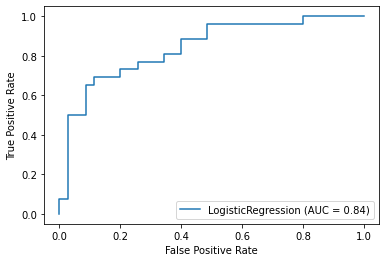

In [81]:
metrics.plot_roc_curve(log_reg, test_x_transformed, test_y)

### Question 3.4 (DONE)
Describe what an ROC curve is and what your ROC graph output is showing.

ROC curve is a graphical way for us to see the the ability of our binary classifier as the discrimination threshold changes. What we see here is how TPR and 1-FPR plays interchangably, and we are trying to maximize for both. This means that we ideally want our model to have plots as near to the top left corner (TPR = 1 and FPR = 0). We see that in our ROC curve that this is yet to be achieved,and this might be due to the fact that we are still using the default settings for our log reg model and we have yet to tweak it to our data.

### Question 3.5 (DONE)
Let's tweak a few settings. Set your solver to `sag`, your `max_iter=10`, and `penalty='none'`, and rerun your model. Report out the same metrics (the 4 + confusion matrix) as before, and also graph an ROC curve. How do your results change?

----------- FOR TEST DATA -----------
accuracy: 0.8801652892561983
precision: 0.875
recall: 0.8672566371681416
f1: 0.8711111111111112
----------- FOR TEST DATA -----------
accuracy: 0.7540983606557377
precision: 0.7307692307692307
recall: 0.7037037037037037
f1: 0.7169811320754716


/Users/brianroysar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


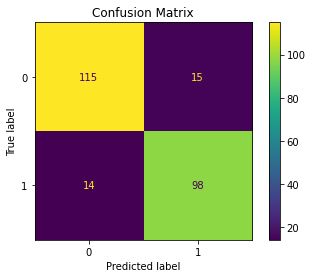

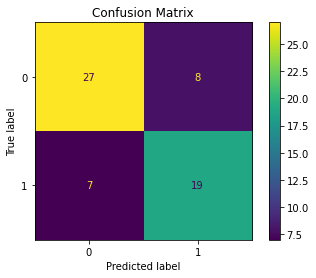

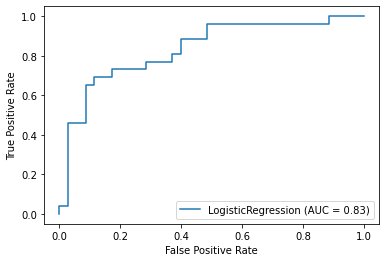

In [89]:
log_reg_tweaked = LogisticRegression(solver='sag', max_iter=10, penalty='none')
log_reg_tweaked.fit(train_x_transformed, train_y)

# For train data
train_predictions = log_reg_tweaked.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = log_reg_tweaked.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(log_reg_tweaked, test_x_transformed, test_y)

After tweaking, the model seemed to get worse, this might be because that these parameters dont fit well with our data. However, the model did not get worse significantly for all metrics. Looking at ROC curve, we also see that our AUC score has dropped by 0.01, and our curve did not approach closer to the top left corner, indicating minimial improvement in our model

### Question 3.6 (DONE)
Did you notice that when you ran the previous model you got the following warning: `ConvergenceWarning: The max_iter was reached which means the coef_ did not converge.` Check the documentation and see if you can implement a fix for this problem, and again report your results (4 metrics, confusion matrix, ROC curve).

Note: if you did not get a warning, which might happen to those running this notebook in VSCode, please try running the following code, as described [here](https://github.com/microsoft/vscode-jupyter/issues/1312):
```
import warnings
warnings.simplefilter(action="default")
```

Yes! We can fix this by increasing our max iter threshold to a much bigger number. In my case, I changed it from 10 to 3000 and the error is now gone.

----------- FOR TEST DATA -----------
accuracy: 0.8842975206611571
precision: 0.875
recall: 0.875
f1: 0.875
----------- FOR TEST DATA -----------
accuracy: 0.7704918032786885
precision: 0.7307692307692307
recall: 0.7307692307692307
f1: 0.7307692307692306


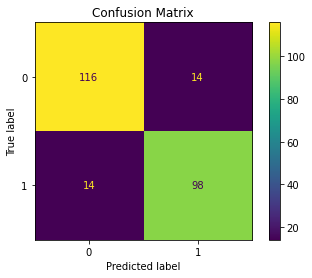

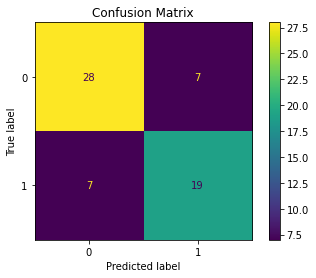

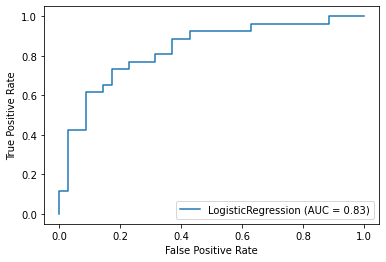

In [90]:
log_reg_tweaked = LogisticRegression(solver='sag', max_iter=3000, penalty='none')
log_reg_tweaked.fit(train_x_transformed, train_y)

# For train data
train_predictions = log_reg_tweaked.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = log_reg_tweaked.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(log_reg_tweaked, test_x_transformed, test_y)

### Question 3.7 (DONE)
Explain what you changed and why this fixed the `ConvergenceWarning` problem. Are there any downsides of your fix? How might you have harmed the outcome instead? What other parameters you set may be playing a factor in affecting the results?

I changed the max iteration parameter by increasing it from 10 to 3000 so there is a convergence. Since our log reg model tries to learn iterativelyy using a solver on data, the more iterations we allow it to do, the more likely we are to overfit our model to our training data. So, although this will improve training data accuracy, it reduces the testing data accuracy. The solver we choose might also impact how our model performs - we can try other sovlers like netwon-cg, saga, lbfgs, and see which one is better.

### Question 3.8 (DONE)
Rerun your logistic classifier, but modify the `penalty='l2'`, `solver='newton-cg'` and again report the results (4 metrics, confusion matrix, ROC curve)


----------- FOR TEST DATA -----------
accuracy: 0.8925619834710744
precision: 0.875
recall: 0.8909090909090909
f1: 0.8828828828828829
----------- FOR TEST DATA -----------
accuracy: 0.7704918032786885
precision: 0.7307692307692307
recall: 0.7307692307692307
f1: 0.7307692307692306


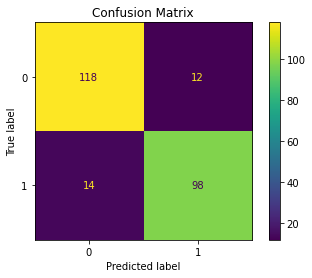

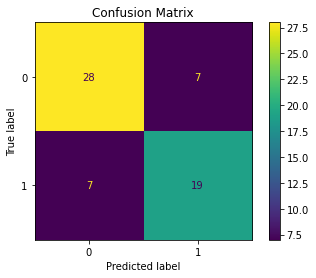

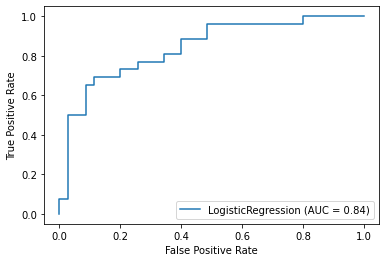

In [102]:
log_reg_newton = LogisticRegression(solver='newton-cg', penalty='l2')
log_reg_newton.fit(train_x_transformed, train_y)

# For train data
train_predictions = log_reg_newton.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = log_reg_newton.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(log_reg_newton, test_x_transformed, test_y)

### Question 3.9 (DONE)
Explain how the 2 solvers work and how they differ from each other.

SAG, also known as Stochastic Average Gradient descent, involves an objective function that we are trying to minimize, and performs gradient descent to achieve this minimum for the objective funciton. On the other hand, we have newton-cg that computes the minimum differently - through the use of a Hessian matrix which is a matrix of partial derivatives of f, the function that we are trying to minimize. 

### Question 3.10 (DONE)
We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and the difference between L1 and L2 penalties.

Penalty term allows us to regularize and shrink our coefficients to prevent overfitting our data. The difference between L1 and L2 is that L1 use the sum of absolute values of coefficeints rather than L2 where it uses the sum of squares. 

### Question 3.11 Support Vector Machine (SVM) (DONE)

A support vector machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In 2-D space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

Implement an SVM classifier on your pipelined data (recommend using `scikit-learn`) For this implementation you can simply use the default settings, but set `probability=True`.

In [103]:
svm = SVC(probability=True)
svm.fit(train_x_transformed, train_y)

SVC(probability=True)

### Question 3.12 (DONE)
Report the accuracy, precision, recall, F1 Score, confusion matrix, and ROC curve of the resulting model.

----------- FOR TEST DATA -----------
accuracy: 0.9421487603305785
precision: 0.9196428571428571
recall: 0.9537037037037037
f1: 0.9363636363636363
----------- FOR TEST DATA -----------
accuracy: 0.7540983606557377
precision: 0.6923076923076923
recall: 0.72
f1: 0.7058823529411765


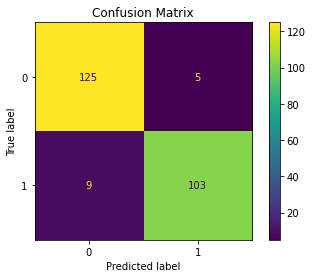

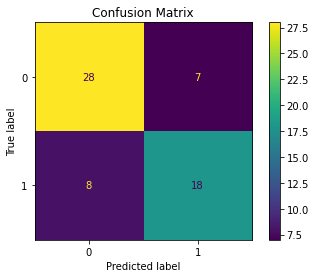

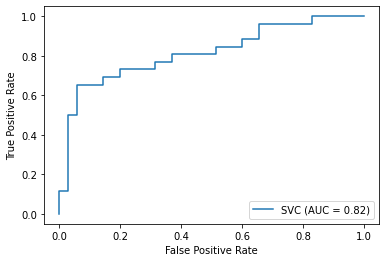

In [104]:
# For train data
train_predictions = svm.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = svm.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(svm, test_x_transformed, test_y)

### Question 3.13
Rerun your SVM, but now modify your model parameter kernel to be `linear`. Again report your accuracy, precision, recall, F1 scores, and confusion matrix and plot the new ROC curve.  

----------- FOR TEST DATA -----------
accuracy: 0.8966942148760331
precision: 0.8660714285714286
recall: 0.9065420560747663
f1: 0.8858447488584474
----------- FOR TEST DATA -----------
accuracy: 0.7704918032786885
precision: 0.7307692307692307
recall: 0.7307692307692307
f1: 0.7307692307692306


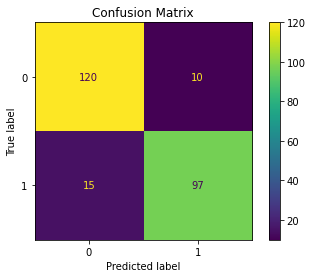

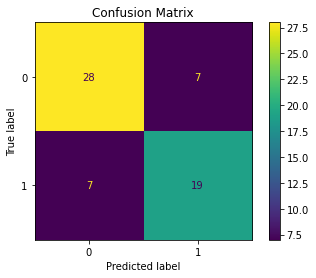

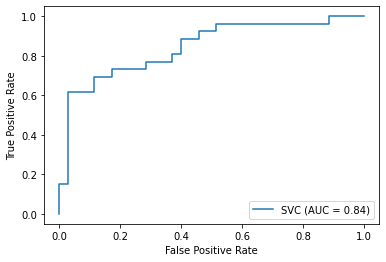

In [105]:
svm_tweaked = SVC(probability=True,kernel="linear")
svm_tweaked.fit(train_x_transformed, train_y)
# For train data
train_predictions = svm_tweaked.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = svm_tweaked.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(svm_tweaked, test_x_transformed, test_y)

### Question 3.14 (DONE)
Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing the kernel parameter might impact the results in the manner you've observed.

We changed our kernel from rbf (gaussian) to linear, which means we changed form using a non linear kernel to a linear kernel. As a side note that is not related to accuracy, generating model from a linear model is much faster compared to a non-linear one. A better performance on the linear model might be because that our data is linearly seperable, quetsioning why we need to extend this model into higher dimensions if we are able to deal with it on a 2-d plane - i.e. it is still able to learn while maintaining efficiency. We also see that the accuracy on training data dropped, meaning that we might have overfitted when we were using rbf, since accuracy for test data increases also when we changed from non linear to linear

### Question 3.15 (DONE)
Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary. How do they differ in how they try to find this boundary?


They differ in the sense that SVM tries to fit a line that seperates our data into two classes on a 2d plane, whereas logistic regressions uses a logistic funciton to model the relationship between our input and output, and where the prediction output can vary from 0 to 1. Log reg then minimizes the loss through a chosen method, and we converge into a solution that we are satisfied with.

### Question 3.16 (DONE)
We also learned about linear regression in class. Why is linear regression not a suitable model for this classification task?

This is because linear regression is better when our output/target is on the continous scale, and with the target we have (sick/not sick) it only takes two values, so a logistic regression is a better fit. We also know that linear regression is more vulnerable to outliers as it will try to fit to those outliers, and thus the predictions for other points will be altered and affected by this

### Statistical Classification Methods
Now we'll explore a statistical classification method, the naive Bayes classifier.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Bayes' theorem states the following relationship, given class variable $C_k$ and dependent feature vector $\bold{x} = [x_1, x_2, ..., x_n]^T$, $$P(C_k | \bold{x}) = \frac{P(C_k)P(\bold{x} | C_k)}{P(\bold{x})}$$

Note for our purposes, there are 2 possible classes (sick or not sick), so $k$ ranges from 1 to 2.

### Question 3.17 (DONE)
Implement a naive Bayes Classifier on the pipelined data. Use the `GaussianNB` model. For this model, simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and confusion matrix. Also, plot an ROC curve.

----------- FOR TEST DATA -----------
              precision    recall  f1-score   support

           0       0.94      0.56      0.70       130
           1       0.65      0.96      0.78       112

    accuracy                           0.74       242
   macro avg       0.79      0.76      0.74       242
weighted avg       0.80      0.74      0.74       242

accuracy: 0.743801652892562
precision: 0.9553571428571429
recall: 0.6524390243902439
f1: 0.7753623188405798
----------- FOR TEST DATA -----------
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        35
           1       0.56      0.77      0.65        26

    accuracy                           0.64        61
   macro avg       0.66      0.66      0.64        61
weighted avg       0.67      0.64      0.64        61

accuracy: 0.639344262295082
precision: 0.7692307692307693
recall: 0.5555555555555556
f1: 0.6451612903225806


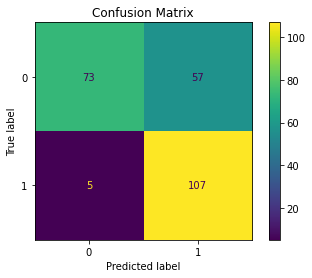

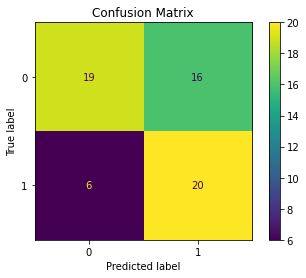

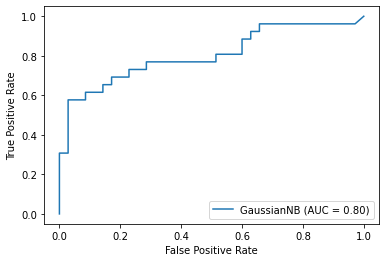

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(train_x_transformed, train_y)

# For train data
train_predictions = gnb.predict(train_x_transformed)
train_acc = metrics.accuracy_score(train_predictions, train_y)
train_prec = metrics.precision_score(train_predictions, train_y)
train_rec = metrics.recall_score(train_predictions, train_y)
train_f1 = metrics.f1_score(train_predictions, train_y)
print("----------- FOR TEST DATA -----------")
print(classification_report(train_y, train_predictions))
print("accuracy: " + str(train_acc))
print("precision: " + str(train_prec))
print("recall: " + str(train_rec))
print("f1: " + str(train_f1))
draw_confusion_matrix(train_y, train_predictions)

# For test data
test_predictions = gnb.predict(test_x_transformed)
test_acc = metrics.accuracy_score(test_predictions, test_y)
test_prec = metrics.precision_score(test_predictions, test_y)
test_rec = metrics.recall_score(test_predictions, test_y)
test_f1 = metrics.f1_score(test_predictions, test_y)
print("----------- FOR TEST DATA -----------")
print(classification_report(test_y, test_predictions))
print("accuracy: " + str(test_acc))
print("precision: " + str(test_prec))
print("recall: " + str(test_rec))
print("f1: " + str(test_f1))
draw_confusion_matrix(test_y, test_predictions)

metrics.plot_roc_curve(gnb, test_x_transformed, test_y)

### Question 3.18 (DONE)
Discuss the observed results. What assumptions about our data are we making here and why might those be inaccurate?

When choosing the naive bayes classifier, we are assuming that our features are independent and as we saw when we analyzed the correlation between variables, some variables exhibited strong correlations meaning that they are not independent. To fix around this, we might need to augment variables by combining dependent variables into one until we are left with a set of independent variables that our NB classifier might work better on.

## Part 4: Cross Validation and Model Selection
You've sampled a number of different classification techniques, leveraging nearest neighbors, linear classifiers, and statistical classifiers. You've also tweaked with a few parameters for those models to optimize performance. Based on these experiments you should have settled on a particular model that performs most optimally on this dataset. Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the train-test split. To check this, we will conduct a K-fold cross validation of our top 2 performing models, assess their cumulative performance across folds (report accuracy, precision, recall, and F1 score), and determine the best model for our particular data.

### Question 4.1(DONE)
Select your top 2 performing models and run a 10-Fold cross validation on both. Report your best performing model. Use the `model_selection.KFold` class from `scikit-learn`.


For this I will be chooing log reg and svm linear

In [135]:
# Log Reg 
kf = KFold(n_splits=10, shuffle=True)
log_reg = LogisticRegression()
sum_acc = 0
sum_prec = 0
sum_rec = 0
sum_f1 = 0
print("-------------------- log reg --------------------")

for train_index, test_index in kf.split(df_transformed):
    #seperating data
    train_x = df_transformed.iloc[train_index, :]
    test_x = df_transformed.iloc[test_index, :]
    train_y = target.iloc[train_index,]
    test_y = target.iloc[test_index,]
    
    # training data
    log_reg.fit(train_x, train_y)
    predictions = log_reg.predict(test_x)
    
    # summing
    sum_acc += metrics.accuracy_score(test_y, predictions)
    sum_prec += metrics.precision_score(test_y, predictions)
    sum_rec += metrics.recall_score(test_y, predictions)
    sum_f1 += metrics.f1_score(test_y, predictions)
    
print("Average Accuracy: " + str(sum_acc/10))
print("Average Precision: " + str(sum_prec/10))
print("Average Recall: " + str(sum_rec/10))
print("Average f1: " + str(sum_f1/10))

print("-------------------- svm linear --------------------")
# svm linear
kf = KFold(n_splits=10, shuffle=True)
svm = SVC(probability=True,kernel="linear")
sum_acc = 0
sum_prec = 0
sum_rec = 0
sum_f1 = 0
for train_index, test_index in kf.split(df_transformed):
    #seperating data
    train_x = df_transformed.iloc[train_index, :]
    test_x = df_transformed.iloc[test_index, :]
    train_y = target.iloc[train_index,]
    test_y = target.iloc[test_index,]
    
    # training data
    svm.fit(train_x, train_y)
    predictions = svm.predict(test_x)
    
    # summing
    sum_acc += metrics.accuracy_score(test_y, predictions)
    sum_prec += metrics.precision_score(test_y, predictions)
    sum_rec += metrics.recall_score(test_y, predictions)
    sum_f1 += metrics.f1_score(test_y, predictions)
    
print("Average Accuracy: " + str(sum_acc/10))
print("Average Precision: " + str(sum_prec/10))
print("Average Recall: " + str(sum_rec/10))
print("Average f1: " + str(sum_f1/10))

-------------------- log reg --------------------
Average Accuracy: 0.8452688172043011
Average Precision: 0.8322064210299503
Average Recall: 0.7789910824469648
Average f1: 0.8003237004930552
-------------------- svm linear --------------------
Average Accuracy: 0.8311827956989246
Average Precision: 0.8273397435897436
Average Recall: 0.7856286549707602
Average f1: 0.8019365399693044


### Question 4.2 (DONE)
Discuss your results and why they differ slightly from what you got for the 2 models above.

This is because that we are testing this (cross-validation) on more samples that we take from our orginial data set. What works for whole data set might not be the same as what works for a subset of data we chose per iteration of this validation. Through cross validation, we have tested our model on different segments of the data, and then taking an average after we test all, rather than evaluating on whole data set. This possibly is more accurate since we are mimicing the process of taking random samples from general population 

### Question 4.3 (DONE)
Out of these 2 models, based on their scores for the 4 metrics, which one would you pick for this specific case of predicting if someone has heart disease or not?

In terms of the case that we have of diagnosing heart disease, the most important metric might want to prioritse looking at recall, which recall was the ratio between true positives to the sum of true positices and false negative (the case that we tell patient that they dont have herat disease where in reality they have it). We want to maximize this as much as possible since we do not want patients with heart disease thinking they do not have it and leave it untreated. Thus, since svm has a higher recall average, I would be more likely to choose this model. however, i would like to explore other models before settling on this one.